In [1]:
from datasets import load_dataset

ds = load_dataset("timm/oxford-iiit-pet")

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'image_id', 'label_cat_dog'],
        num_rows: 3680
    })
    test: Dataset({
        features: ['image', 'label', 'image_id', 'label_cat_dog'],
        num_rows: 3669
    })
})

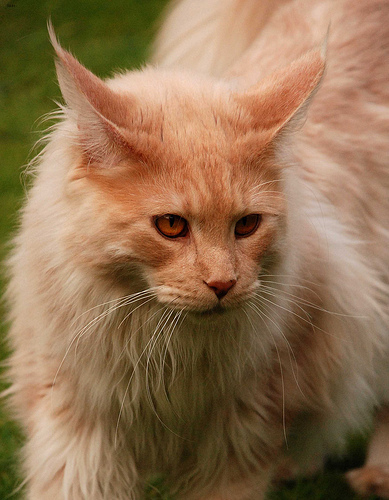

In [3]:
ds['train'][0]['image']

In [4]:
df_train = ds['train'].to_pandas()
df_test = ds['test'].to_pandas()

In [5]:
df_train

image  label  \
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     20   
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      1   
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     18   
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     16   
4     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     14   
...                                                 ...    ...   
3675  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     14   
3676  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     26   
3677  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      1   
3678  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     35   
3679  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     17   

                    image_id  label_cat_dog  
0             Maine_Coon_204              0  
1       american_bulldog_138              1  
2               keeshond_112              1  
3               havanese_157              1  
4     german_shorthaired_132              1  
...                      ...            ...  
3675  german_shorthaired_138              1  
3676             Ragdoll_169              0  
3677    american_bulldog_107              1  
3678     wheaten_terrier_159              1  
3679       japanese_chin_188              1  

[3680 rows x 4 columns]

In [6]:
df_test

image  label  \
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     22   
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     25   
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      1   
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     15   
4     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     16   
...                                                 ...    ...   
3664  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     10   
3665  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     17   
3666  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     28   
3667  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     21   
3668  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     10   

                   image_id  label_cat_dog  
0           newfoundland_31              1  
1                    pug_57              1  
2       american_bulldog_80              1  
3         great_pyrenees_22              1  
4               havanese_97              1  
...                     ...            ...  
3664           chihuahua_91              1  
3665       japanese_chin_83              1  
3666       saint_bernard_88              1  
3667  miniature_pinscher_32              1  
3668           chihuahua_35              1  

[3669 rows x 4 columns]

In [7]:
# rename label to label_breed
df_train.rename(columns={'label': 'label_breed'}, inplace=True)
df_test.rename(columns={'label': 'label_breed'}, inplace=True)

In [8]:
# if label_cat_dog is 0 then it is a cat, otherwise it is a dog
df_train['label_cat_dog'] = df_train['label_cat_dog'].apply(lambda x: 'cat' if x == 0 else 'dog')
df_test['label_cat_dog'] = df_test['label_cat_dog'].apply(lambda x: 'cat' if x == 0 else 'dog')

In [9]:
class_label = {
    '0': 'abyssinian',
    '1': 'american_bulldog',
    '2': 'american_pit_bull_terrier',
    '3': 'basset_hound',
    '4': 'beagle',
    '5': 'bengal',
    '6': 'birman',
    '7': 'bombay',
    '8': 'boxer',
    '9': 'british_shorthair',
    '10': 'chihuahua',
    '11': 'egyptian_mau',
    '12': 'english_cocker_spaniel',
    '13': 'english_setter',
    '14': 'german_shorthaired',
    '15': 'great_pyrenees',
    '16': 'havanese',
    '17': 'japanese_chin',
    '18': 'keeshond',
    '19': 'leonberger',
    '20': 'maine_coon',
    '21': 'miniature_pinscher',
    '22': 'newfoundland',
    '23': 'persian',
    '24': 'pomeranian',
    '25': 'pug',
    '26': 'ragdoll',
    '27': 'russian_blue',
    '28': 'saint_bernard',
    '29': 'samoyed',
    '30': 'scottish_terrier',
    '31': 'shiba_inu',
    '32': 'siamese',
    '33': 'sphynx',
    '34': 'staffordshire_bull_terrier',
    '35': 'wheaten_terrier',
    '36': 'yorkshire_terrier'
}

df_train['label_breed'] = df_train['label_breed'].astype(str).map(class_label)
df_test['label_breed'] = df_test['label_breed'].astype(str).map(class_label)


In [10]:
import pandas as pd

df_obj = pd.read_parquet('object_annotations.parquet')

df_obj['bbox'] = df_obj.apply(lambda row: [row['col_x'], row['row_y'], row['width'], row['height']], axis=1)
df_obj = df_obj.drop(columns=['col_x', 'row_y', 'width', 'height', 'caption', 'source'])
df_obj = df_obj.groupby('filename').agg({'bbox': list, 'confidence': list, 'label': list}).reset_index()
df_obj['labels'] = df_obj.apply(lambda row: [{'bbox': bbox, 'confidence': confidence, 'label': label} for bbox, confidence, label in zip(row['bbox'], row['confidence'], row['label'])], axis=1)
df_obj = df_obj[['filename', 'labels']]
df_obj

filename  \
0             oxford-iiit-pet/images/Abyssinian_1.jpg   
1            oxford-iiit-pet/images/Abyssinian_10.jpg   
2           oxford-iiit-pet/images/Abyssinian_100.jpg   
3           oxford-iiit-pet/images/Abyssinian_101.jpg   
4           oxford-iiit-pet/images/Abyssinian_102.jpg   
...                                               ...   
7270  oxford-iiit-pet/images/yorkshire_terrier_95.jpg   
7271  oxford-iiit-pet/images/yorkshire_terrier_96.jpg   
7272  oxford-iiit-pet/images/yorkshire_terrier_97.jpg   
7273  oxford-iiit-pet/images/yorkshire_terrier_98.jpg   
7274  oxford-iiit-pet/images/yorkshire_terrier_99.jpg   

                                                 labels  
0     [{'bbox': [98.0, 71.0, 359.0, 269.0], 'confide...  
1     [{'bbox': [-1.0, 105.0, 287.0, 395.0], 'confid...  
2     [{'bbox': [48.0, 72.0, 288.0, 371.0], 'confide...  
3     [{'bbox': [55.0, 32.0, 313.0, 204.0], 'confide...  
4     [{'bbox': [22.0, 25.0, 477.0, 440.0], 'confide...  
...                                                 ...  
7270  [{'bbox': [103.0, 69.0, 250.0, 223.0], 'confid...  
7271  [{'bbox': [1.0, 0.0, 390.0, 335.0], 'confidenc...  
7272  [{'bbox': [0.0, 66.0, 320.0, 262.0], 'confiden...  
7273  [{'bbox': [90.0, 107.0, 239.0, 241.0], 'confid...  
7274  [{'bbox': [183.0, 46.0, 264.0, 272.0], 'confid...  

[7275 rows x 2 columns]

In [11]:
# drop oxford-iiit-pet/images/ from filename
df_obj['filename'] = df_obj['filename'].apply(lambda x: x.replace('oxford-iiit-pet/images/', ''))
df_obj

filename  \
0             Abyssinian_1.jpg   
1            Abyssinian_10.jpg   
2           Abyssinian_100.jpg   
3           Abyssinian_101.jpg   
4           Abyssinian_102.jpg   
...                        ...   
7270  yorkshire_terrier_95.jpg   
7271  yorkshire_terrier_96.jpg   
7272  yorkshire_terrier_97.jpg   
7273  yorkshire_terrier_98.jpg   
7274  yorkshire_terrier_99.jpg   

                                                 labels  
0     [{'bbox': [98.0, 71.0, 359.0, 269.0], 'confide...  
1     [{'bbox': [-1.0, 105.0, 287.0, 395.0], 'confid...  
2     [{'bbox': [48.0, 72.0, 288.0, 371.0], 'confide...  
3     [{'bbox': [55.0, 32.0, 313.0, 204.0], 'confide...  
4     [{'bbox': [22.0, 25.0, 477.0, 440.0], 'confide...  
...                                                 ...  
7270  [{'bbox': [103.0, 69.0, 250.0, 223.0], 'confid...  
7271  [{'bbox': [1.0, 0.0, 390.0, 335.0], 'confidenc...  
7272  [{'bbox': [0.0, 66.0, 320.0, 262.0], 'confiden...  
7273  [{'bbox': [90.0, 107.0, 239.0, 241.0], 'confid...  
7274  [{'bbox': [183.0, 46.0, 264.0, 272.0], 'confid...  

[7275 rows x 2 columns]

In [12]:
# drop .jpg from filename
df_obj['filename'] = df_obj['filename'].apply(lambda x: x.replace('.jpg', ''))
df_obj

filename                                             labels
0             Abyssinian_1  [{'bbox': [98.0, 71.0, 359.0, 269.0], 'confide...
1            Abyssinian_10  [{'bbox': [-1.0, 105.0, 287.0, 395.0], 'confid...
2           Abyssinian_100  [{'bbox': [48.0, 72.0, 288.0, 371.0], 'confide...
3           Abyssinian_101  [{'bbox': [55.0, 32.0, 313.0, 204.0], 'confide...
4           Abyssinian_102  [{'bbox': [22.0, 25.0, 477.0, 440.0], 'confide...
...                    ...                                                ...
7270  yorkshire_terrier_95  [{'bbox': [103.0, 69.0, 250.0, 223.0], 'confid...
7271  yorkshire_terrier_96  [{'bbox': [1.0, 0.0, 390.0, 335.0], 'confidenc...
7272  yorkshire_terrier_97  [{'bbox': [0.0, 66.0, 320.0, 262.0], 'confiden...
7273  yorkshire_terrier_98  [{'bbox': [90.0, 107.0, 239.0, 241.0], 'confid...
7274  yorkshire_terrier_99  [{'bbox': [183.0, 46.0, 264.0, 272.0], 'confid...

[7275 rows x 2 columns]

In [13]:
# merge df_obj labels column into df_train on image_id and filename

df_train = df_train.merge(df_obj, how='left', left_on='image_id', right_on='filename')
df_test = df_test.merge(df_obj, how='left', left_on='image_id', right_on='filename')
df_train

image         label_breed  \
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...          maine_coon   
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            keeshond   
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            havanese   
4     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
...                                                 ...                 ...   
3675  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
3676  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...             ragdoll   
3677  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
3678  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     wheaten_terrier   
3679  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       japanese_chin   

                    image_id label_cat_dog                filename  \
0             Maine_Coon_204           cat          Maine_Coon_204   
1       american_bulldog_138           dog    american_bulldog_138   
2               keeshond_112           dog            keeshond_112   
3               havanese_157           dog            havanese_157   
4     german_shorthaired_132           dog  german_shorthaired_132   
...                      ...           ...                     ...   
3675  german_shorthaired_138           dog  german_shorthaired_138   
3676             Ragdoll_169           cat             Ragdoll_169   
3677    american_bulldog_107           dog    american_bulldog_107   
3678     wheaten_terrier_159           dog     wheaten_terrier_159   
3679       japanese_chin_188           dog       japanese_chin_188   

                                                 labels  
0     [{'bbox': [2.0, 1.0, 386.0, 497.0], 'confidenc...  
1     [{'bbox': [-0.0, 0.0, 319.0, 471.0], 'confiden...  
2     [{'bbox': [133.0, 22.0, 344.0, 344.0], 'confid...  
3     [{'bbox': [145.0, 11.0, 331.0, 319.0], 'confid...  
4     [{'bbox': [142.0, 28.0, 238.0, 304.0], 'confid...  
...                                                 ...  
3675  [{'bbox': [168.0, 7.0, 180.0, 359.0], 'confide...  
3676  [{'bbox': [30.0, 74.0, 303.0, 390.0], 'confide...  
3677  [{'bbox': [0.0, 71.0, 135.0, 216.0], 'confiden...  
3678  [{'bbox': [17.0, 46.0, 393.0, 301.0], 'confide...  
3679  [{'bbox': [137.0, 45.0, 331.0, 330.0], 'confid...  

[3680 rows x 6 columns]

In [14]:
# drop filename column
df_train = df_train.drop(columns=['filename'])
df_test = df_test.drop(columns=['filename'])
df_train

image         label_breed  \
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...          maine_coon   
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            keeshond   
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            havanese   
4     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
...                                                 ...                 ...   
3675  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
3676  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...             ragdoll   
3677  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
3678  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     wheaten_terrier   
3679  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       japanese_chin   

                    image_id label_cat_dog  \
0             Maine_Coon_204           cat   
1       american_bulldog_138           dog   
2               keeshond_112           dog   
3               havanese_157           dog   
4     german_shorthaired_132           dog   
...                      ...           ...   
3675  german_shorthaired_138           dog   
3676             Ragdoll_169           cat   
3677    american_bulldog_107           dog   
3678     wheaten_terrier_159           dog   
3679       japanese_chin_188           dog   

                                                 labels  
0     [{'bbox': [2.0, 1.0, 386.0, 497.0], 'confidenc...  
1     [{'bbox': [-0.0, 0.0, 319.0, 471.0], 'confiden...  
2     [{'bbox': [133.0, 22.0, 344.0, 344.0], 'confid...  
3     [{'bbox': [145.0, 11.0, 331.0, 319.0], 'confid...  
4     [{'bbox': [142.0, 28.0, 238.0, 304.0], 'confid...  
...                                                 ...  
3675  [{'bbox': [168.0, 7.0, 180.0, 359.0], 'confide...  
3676  [{'bbox': [30.0, 74.0, 303.0, 390.0], 'confide...  
3677  [{'bbox': [0.0, 71.0, 135.0, 216.0], 'confiden...  
3678  [{'bbox': [17.0, 46.0, 393.0, 301.0], 'confide...  
3679  [{'bbox': [137.0, 45.0, 331.0, 330.0], 'confid...  

[3680 rows x 5 columns]

In [15]:
# rename labels to labels_bbox_enriched
df_train.rename(columns={'labels': 'labels_bbox_enriched'}, inplace=True)
df_test.rename(columns={'labels': 'labels_bbox_enriched'}, inplace=True)

df_train

image         label_breed  \
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...          maine_coon   
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            keeshond   
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            havanese   
4     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
...                                                 ...                 ...   
3675  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
3676  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...             ragdoll   
3677  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
3678  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     wheaten_terrier   
3679  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       japanese_chin   

                    image_id label_cat_dog  \
0             Maine_Coon_204           cat   
1       american_bulldog_138           dog   
2               keeshond_112           dog   
3               havanese_157           dog   
4     german_shorthaired_132           dog   
...                      ...           ...   
3675  german_shorthaired_138           dog   
3676             Ragdoll_169           cat   
3677    american_bulldog_107           dog   
3678     wheaten_terrier_159           dog   
3679       japanese_chin_188           dog   

                                   labels_bbox_enriched  
0     [{'bbox': [2.0, 1.0, 386.0, 497.0], 'confidenc...  
1     [{'bbox': [-0.0, 0.0, 319.0, 471.0], 'confiden...  
2     [{'bbox': [133.0, 22.0, 344.0, 344.0], 'confid...  
3     [{'bbox': [145.0, 11.0, 331.0, 319.0], 'confid...  
4     [{'bbox': [142.0, 28.0, 238.0, 304.0], 'confid...  
...                                                 ...  
3675  [{'bbox': [168.0, 7.0, 180.0, 359.0], 'confide...  
3676  [{'bbox': [30.0, 74.0, 303.0, 390.0], 'confide...  
3677  [{'bbox': [0.0, 71.0, 135.0, 216.0], 'confiden...  
3678  [{'bbox': [17.0, 46.0, 393.0, 301.0], 'confide...  
3679  [{'bbox': [137.0, 45.0, 331.0, 330.0], 'confid...  

[3680 rows x 5 columns]

In [16]:
df_img = pd.read_parquet('image_annotations.parquet')
df_img

video  frame_timestamp                                         filename  \
0     None              NaN        oxford-iiit-pet/images/Abyssinian_144.jpg   
1     None              NaN         oxford-iiit-pet/images/Abyssinian_10.jpg   
2     None              NaN        oxford-iiit-pet/images/Abyssinian_155.jpg   
3     None              NaN        oxford-iiit-pet/images/Abyssinian_101.jpg   
4     None              NaN        oxford-iiit-pet/images/Abyssinian_156.jpg   
...    ...              ...                                              ...   
7304  None              NaN  oxford-iiit-pet/images/yorkshire_terrier_99.jpg   
7305  None              NaN  oxford-iiit-pet/images/yorkshire_terrier_56.jpg   
7306  None              NaN  oxford-iiit-pet/images/yorkshire_terrier_97.jpg   
7307  None              NaN  oxford-iiit-pet/images/yorkshire_terrier_58.jpg   
7308  None              NaN   oxford-iiit-pet/images/yorkshire_terrier_6.jpg   

                                                caption  ann_index  label  \
0      a cat standing on a wooden floor next to a glass       49.0  [cat]   
1                                 a cat laying on a bed       11.0  [cat]   
2                              a cat yawning on a couch     1856.0  [cat]   
3     a cat with green eyes is laying on a green bla...        2.0  [cat]   
4                           a cat is sitting on a couch     1857.0  [cat]   
...                                                 ...        ...    ...   
7304                 a small dog standing on a sidewalk     7348.0  [dog]   
7305               a small dog is standing in the grass     7301.0  [dog]   
7306                  a small dog is standing on a rock     7346.0  [dog]   
7307  a small black and brown puppy is being held by...     7303.0  [dog]   
7308   a small black and gray dog standing in the grass     7316.0  [dog]   

     class_id vl_label vl_class_id  
0         [1]     None        None  
1         [1]     None        None  
2         [1]     None        None  
3         [1]     None        None  
4         [1]     None        None  
...       ...      ...         ...  
7304      [2]     None        None  
7305      [2]     None        None  
7306      [2]     None        None  
7307      [2]     None        None  
7308      [2]     None        None  

[7309 rows x 9 columns]

In [17]:
# drop all columns except filename and caption
df_img = df_img[['filename', 'caption']]
df_img

filename  \
0           oxford-iiit-pet/images/Abyssinian_144.jpg   
1            oxford-iiit-pet/images/Abyssinian_10.jpg   
2           oxford-iiit-pet/images/Abyssinian_155.jpg   
3           oxford-iiit-pet/images/Abyssinian_101.jpg   
4           oxford-iiit-pet/images/Abyssinian_156.jpg   
...                                               ...   
7304  oxford-iiit-pet/images/yorkshire_terrier_99.jpg   
7305  oxford-iiit-pet/images/yorkshire_terrier_56.jpg   
7306  oxford-iiit-pet/images/yorkshire_terrier_97.jpg   
7307  oxford-iiit-pet/images/yorkshire_terrier_58.jpg   
7308   oxford-iiit-pet/images/yorkshire_terrier_6.jpg   

                                                caption  
0      a cat standing on a wooden floor next to a glass  
1                                 a cat laying on a bed  
2                              a cat yawning on a couch  
3     a cat with green eyes is laying on a green bla...  
4                           a cat is sitting on a couch  
...                                                 ...  
7304                 a small dog standing on a sidewalk  
7305               a small dog is standing in the grass  
7306                  a small dog is standing on a rock  
7307  a small black and brown puppy is being held by...  
7308   a small black and gray dog standing in the grass  

[7309 rows x 2 columns]

In [18]:
# remove oxford-iiit-pet/images/ from filenmae
df_img['filename'] = df_img['filename'].apply(lambda x: x.replace('oxford-iiit-pet/images/', ''))
df_img

/tmp/ipykernel_23777/3367795791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img['filename'] = df_img['filename'].apply(lambda x: x.replace('oxford-iiit-pet/images/', ''))


filename  \
0           Abyssinian_144.jpg   
1            Abyssinian_10.jpg   
2           Abyssinian_155.jpg   
3           Abyssinian_101.jpg   
4           Abyssinian_156.jpg   
...                        ...   
7304  yorkshire_terrier_99.jpg   
7305  yorkshire_terrier_56.jpg   
7306  yorkshire_terrier_97.jpg   
7307  yorkshire_terrier_58.jpg   
7308   yorkshire_terrier_6.jpg   

                                                caption  
0      a cat standing on a wooden floor next to a glass  
1                                 a cat laying on a bed  
2                              a cat yawning on a couch  
3     a cat with green eyes is laying on a green bla...  
4                           a cat is sitting on a couch  
...                                                 ...  
7304                 a small dog standing on a sidewalk  
7305               a small dog is standing in the grass  
7306                  a small dog is standing on a rock  
7307  a small black and brown puppy is being held by...  
7308   a small black and gray dog standing in the grass  

[7309 rows x 2 columns]

In [19]:
# remove .jpg from iflename
df_img['filename'] = df_img['filename'].apply(lambda x: x.replace('.jpg', ''))
df_img

/tmp/ipykernel_23777/2812509310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img['filename'] = df_img['filename'].apply(lambda x: x.replace('.jpg', ''))


filename                                            caption
0           Abyssinian_144   a cat standing on a wooden floor next to a glass
1            Abyssinian_10                              a cat laying on a bed
2           Abyssinian_155                           a cat yawning on a couch
3           Abyssinian_101  a cat with green eyes is laying on a green bla...
4           Abyssinian_156                        a cat is sitting on a couch
...                    ...                                                ...
7304  yorkshire_terrier_99                 a small dog standing on a sidewalk
7305  yorkshire_terrier_56               a small dog is standing in the grass
7306  yorkshire_terrier_97                  a small dog is standing on a rock
7307  yorkshire_terrier_58  a small black and brown puppy is being held by...
7308   yorkshire_terrier_6   a small black and gray dog standing in the grass

[7309 rows x 2 columns]

In [20]:
# merge df_img into df_train on image_id and filename
df_train = df_train.merge(df_img, how='left', left_on='image_id', right_on='filename')
df_test = df_test.merge(df_img, how='left', left_on='image_id', right_on='filename')

df_train

image         label_breed  \
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...          maine_coon   
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            keeshond   
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            havanese   
4     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
...                                                 ...                 ...   
3675  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
3676  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...             ragdoll   
3677  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
3678  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     wheaten_terrier   
3679  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       japanese_chin   

                    image_id label_cat_dog  \
0             Maine_Coon_204           cat   
1       american_bulldog_138           dog   
2               keeshond_112           dog   
3               havanese_157           dog   
4     german_shorthaired_132           dog   
...                      ...           ...   
3675  german_shorthaired_138           dog   
3676             Ragdoll_169           cat   
3677    american_bulldog_107           dog   
3678     wheaten_terrier_159           dog   
3679       japanese_chin_188           dog   

                                   labels_bbox_enriched  \
0     [{'bbox': [2.0, 1.0, 386.0, 497.0], 'confidenc...   
1     [{'bbox': [-0.0, 0.0, 319.0, 471.0], 'confiden...   
2     [{'bbox': [133.0, 22.0, 344.0, 344.0], 'confid...   
3     [{'bbox': [145.0, 11.0, 331.0, 319.0], 'confid...   
4     [{'bbox': [142.0, 28.0, 238.0, 304.0], 'confid...   
...                                                 ...   
3675  [{'bbox': [168.0, 7.0, 180.0, 359.0], 'confide...   
3676  [{'bbox': [30.0, 74.0, 303.0, 390.0], 'confide...   
3677  [{'bbox': [0.0, 71.0, 135.0, 216.0], 'confiden...   
3678  [{'bbox': [17.0, 46.0, 393.0, 301.0], 'confide...   
3679  [{'bbox': [137.0, 45.0, 331.0, 330.0], 'confid...   

                    filename  \
0             Maine_Coon_204   
1       american_bulldog_138   
2               keeshond_112   
3               havanese_157   
4     german_shorthaired_132   
...                      ...   
3675  german_shorthaired_138   
3676             Ragdoll_169   
3677    american_bulldog_107   
3678     wheaten_terrier_159   
3679       japanese_chin_188   

                                                caption  
0                                a cat walking on grass  
1                       a white dog playing with a ball  
2                            a dog sitting in the grass  
3                             a dog laying in the grass  
4                            a dog standing in the snow  
...                                                 ...  
3675                 a dog standing on a concrete floor  
3676                              a cat laying on a bed  
3677                             a dog sitting in a bed  
3678                         a dog sitting on the floor  
3679  a dog with a long tongue sticking out of its m...  

[3680 rows x 7 columns]

In [21]:
# drop filename
df_train = df_train.drop(columns=['filename'])
df_test = df_test.drop(columns=['filename'])

df_train

image         label_breed  \
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...          maine_coon   
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            keeshond   
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            havanese   
4     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
...                                                 ...                 ...   
3675  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
3676  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...             ragdoll   
3677  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
3678  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     wheaten_terrier   
3679  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       japanese_chin   

                    image_id label_cat_dog  \
0             Maine_Coon_204           cat   
1       american_bulldog_138           dog   
2               keeshond_112           dog   
3               havanese_157           dog   
4     german_shorthaired_132           dog   
...                      ...           ...   
3675  german_shorthaired_138           dog   
3676             Ragdoll_169           cat   
3677    american_bulldog_107           dog   
3678     wheaten_terrier_159           dog   
3679       japanese_chin_188           dog   

                                   labels_bbox_enriched  \
0     [{'bbox': [2.0, 1.0, 386.0, 497.0], 'confidenc...   
1     [{'bbox': [-0.0, 0.0, 319.0, 471.0], 'confiden...   
2     [{'bbox': [133.0, 22.0, 344.0, 344.0], 'confid...   
3     [{'bbox': [145.0, 11.0, 331.0, 319.0], 'confid...   
4     [{'bbox': [142.0, 28.0, 238.0, 304.0], 'confid...   
...                                                 ...   
3675  [{'bbox': [168.0, 7.0, 180.0, 359.0], 'confide...   
3676  [{'bbox': [30.0, 74.0, 303.0, 390.0], 'confide...   
3677  [{'bbox': [0.0, 71.0, 135.0, 216.0], 'confiden...   
3678  [{'bbox': [17.0, 46.0, 393.0, 301.0], 'confide...   
3679  [{'bbox': [137.0, 45.0, 331.0, 330.0], 'confid...   

                                                caption  
0                                a cat walking on grass  
1                       a white dog playing with a ball  
2                            a dog sitting in the grass  
3                             a dog laying in the grass  
4                            a dog standing in the snow  
...                                                 ...  
3675                 a dog standing on a concrete floor  
3676                              a cat laying on a bed  
3677                             a dog sitting in a bed  
3678                         a dog sitting on the floor  
3679  a dog with a long tongue sticking out of its m...  

[3680 rows x 6 columns]

In [22]:
# rename caption to caption_enriched
df_train.rename(columns={'caption': 'caption_enriched'}, inplace=True)
df_test.rename(columns={'caption': 'caption_enriched'}, inplace=True)

df_train

image         label_breed  \
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...          maine_coon   
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            keeshond   
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            havanese   
4     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
...                                                 ...                 ...   
3675  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  german_shorthaired   
3676  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...             ragdoll   
3677  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
3678  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...     wheaten_terrier   
3679  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       japanese_chin   

                    image_id label_cat_dog  \
0             Maine_Coon_204           cat   
1       american_bulldog_138           dog   
2               keeshond_112           dog   
3               havanese_157           dog   
4     german_shorthaired_132           dog   
...                      ...           ...   
3675  german_shorthaired_138           dog   
3676             Ragdoll_169           cat   
3677    american_bulldog_107           dog   
3678     wheaten_terrier_159           dog   
3679       japanese_chin_188           dog   

                                   labels_bbox_enriched  \
0     [{'bbox': [2.0, 1.0, 386.0, 497.0], 'confidenc...   
1     [{'bbox': [-0.0, 0.0, 319.0, 471.0], 'confiden...   
2     [{'bbox': [133.0, 22.0, 344.0, 344.0], 'confid...   
3     [{'bbox': [145.0, 11.0, 331.0, 319.0], 'confid...   
4     [{'bbox': [142.0, 28.0, 238.0, 304.0], 'confid...   
...                                                 ...   
3675  [{'bbox': [168.0, 7.0, 180.0, 359.0], 'confide...   
3676  [{'bbox': [30.0, 74.0, 303.0, 390.0], 'confide...   
3677  [{'bbox': [0.0, 71.0, 135.0, 216.0], 'confiden...   
3678  [{'bbox': [17.0, 46.0, 393.0, 301.0], 'confide...   
3679  [{'bbox': [137.0, 45.0, 331.0, 330.0], 'confid...   

                                       caption_enriched  
0                                a cat walking on grass  
1                       a white dog playing with a ball  
2                            a dog sitting in the grass  
3                             a dog laying in the grass  
4                            a dog standing in the snow  
...                                                 ...  
3675                 a dog standing on a concrete floor  
3676                              a cat laying on a bed  
3677                             a dog sitting in a bed  
3678                         a dog sitting on the floor  
3679  a dog with a long tongue sticking out of its m...  

[3680 rows x 6 columns]

In [23]:
df_test

image         label_breed  \
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...        newfoundland   
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...                 pug   
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...    american_bulldog   
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      great_pyrenees   
4     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...            havanese   
...                                                 ...                 ...   
3664  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...           chihuahua   
3665  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       japanese_chin   
3666  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       saint_bernard   
3667  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  miniature_pinscher   
3668  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...           chihuahua   

                   image_id label_cat_dog  \
0           newfoundland_31           dog   
1                    pug_57           dog   
2       american_bulldog_80           dog   
3         great_pyrenees_22           dog   
4               havanese_97           dog   
...                     ...           ...   
3664           chihuahua_91           dog   
3665       japanese_chin_83           dog   
3666       saint_bernard_88           dog   
3667  miniature_pinscher_32           dog   
3668           chihuahua_35           dog   

                                   labels_bbox_enriched  \
0                                                   NaN   
1     [{'bbox': [186.0, 80.0, 314.0, 253.0], 'confid...   
2     [{'bbox': [174.0, 142.0, 197.0, 104.0], 'confi...   
3     [{'bbox': [7.0, 77.0, 472.0, 265.0], 'confiden...   
4     [{'bbox': [104.0, 13.0, 309.0, 320.0], 'confid...   
...                                                 ...   
3664  [{'bbox': [158.0, 107.0, 92.0, 180.0], 'confid...   
3665  [{'bbox': [136.0, 48.0, 110.0, 161.0], 'confid...   
3666  [{'bbox': [104.0, 57.0, 396.0, 276.0], 'confid...   
3667  [{'bbox': [1.0, -1.0, 303.0, 375.0], 'confiden...   
3668  [{'bbox': [-1.0, 29.0, 303.0, 471.0], 'confide...   

                                  caption_enriched  
0             a large black dog standing on a rock  
1                   a pug dog sitting in the grass  
2                  a white dog laying in the grass  
3         a large white dog laying on a red carpet  
4         a black and white dog with a blue collar  
...                                            ...  
3664      a dog jumping over a blue and green ring  
3665                      a dog sitting on a couch  
3666  a large brown and white dog with a red leash  
3667          a dog is looking at a stuffed animal  
3668               a small white dog with big ears  

[3669 rows x 6 columns]

In [24]:
from datasets import Dataset, DatasetDict, Image

train = Dataset.from_pandas(df_train)
test = Dataset.from_pandas(df_test)

In [25]:
train[0]['image']

{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xed\x18TPhotoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x07\x1c\x02\x00\x00\x02\x00\x02\x008BIM\x04%\x00\x00\x00\x00\x00\x10F\x0c\xf2\x89&\xb8V\xda\xb0\x9c\x01\xa1\xb0\xa7\x90w8BIM\x03\xed\x00\x00\x00\x00\x00\x10\x00H\x00\x00\x00\x01\x00\x02\x00H\x00\x00\x00\x01\x00\x028BIM\x04&\x00\x00\x00\x00\x00\x0e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00?\x80\x00\x008BIM\x04\r\x00\x00\x00\x00\x00\x04\x00\x00\x00\x1e8BIM\x04\x19\x00\x00\x00\x00\x00\x04\x00\x00\x00\x1e8BIM\x03\xf3\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\x00\x01\x008BIM\x04\n\x00\x00\x00\x00\x00\x01\x00\x008BIM\'\x10\x00\x00\x00\x00\x00\n\x00\x01\x00\x00\x00\x00\x00\x00\x00\x028BIM\x03\xf5\x00\x00\x00\x00\x00H\x00/ff\x00\x01\x00lff\x00\x06\x00\x00\x00\x00\x00\x01\x00/ff\x00\x01\x00\xa1\x99\x9a\x00\x06\x00\x00\x00\x00\x00\x01\x002\x00\x00\x00\x01\x00Z\x00\x00\x00\x06\x00\x00\x00\x00\x00\x01\x005\x00\x00\x00\x01\x00-\x00\x00\x00\x06\x00\x00\x00\x0

In [ ]:
train.cast_column('image', Image())
test.cast_column('image', Image())

In [37]:
enriched_ds = DatasetDict({'train': train, 'test': test})

In [41]:
enriched_ds['train'] = enriched_ds['train'].cast_column("image", Image())
enriched_ds['test'] = enriched_ds['test'].cast_column("image", Image())


In [42]:
enriched_ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label_breed', 'image_id', 'label_cat_dog', 'labels_bbox_enriched', 'caption_enriched'],
        num_rows: 3680
    })
    test: Dataset({
        features: ['image', 'label_breed', 'image_id', 'label_cat_dog', 'labels_bbox_enriched', 'caption_enriched'],
        num_rows: 3669
    })
})

In [48]:
new_column_order = [
    'image_id',
    'image',
    'label_cat_dog',
    'label_breed',
    'labels_bbox_enriched',
    'caption_enriched'
]

# Rearrange columns for both train and test sets
enriched_ds = DatasetDict({
    'train': enriched_ds['train'].select_columns(new_column_order),
    'test': enriched_ds['test'].select_columns(new_column_order)
})

In [49]:
enriched_ds

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'label_cat_dog', 'label_breed', 'labels_bbox_enriched', 'caption_enriched'],
        num_rows: 3680
    })
    test: Dataset({
        features: ['image_id', 'image', 'label_cat_dog', 'label_breed', 'labels_bbox_enriched', 'caption_enriched'],
        num_rows: 3669
    })
})

In [50]:
enriched_ds.push_to_hub('dnth/pets-enriched')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/3680 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/37 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/3669 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/37 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/dnth/pets-enriched/commit/e9eeb3ecbee85b319f0dbabf9ecba910bcfdbccd', commit_message='Upload dataset', commit_description='', oid='e9eeb3ecbee85b319f0dbabf9ecba910bcfdbccd', pr_url=None, pr_revision=None, pr_num=None)

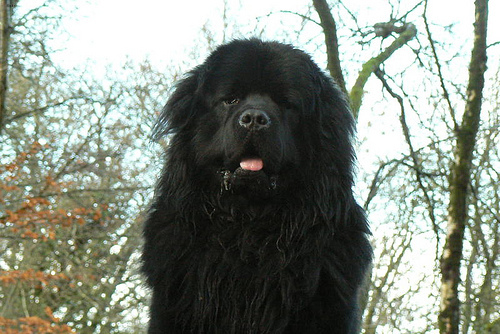

In [44]:
enriched_ds['test'][0]['image']